In [2]:
import pandas as pd # perhaps importing pandas as urso_polar would be better
import filters as ft
import numpy as np

data = pd.read_csv('crimes.csv')
data.shape

(1456714, 23)

In [3]:
data.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456714 entries, 0 to 1456713
Data columns (total 23 columns):
Unnamed: 0              1456714 non-null int64
ID                      1456714 non-null int64
Case Number             1456713 non-null object
Date                    1456714 non-null object
Block                   1456714 non-null object
IUCR                    1456714 non-null object
Primary Type            1456714 non-null object
Description             1456714 non-null object
Location Description    1455056 non-null object
Arrest                  1456714 non-null bool
Domestic                1456714 non-null bool
Beat                    1456714 non-null int64
District                1456713 non-null float64
Ward                    1456700 non-null float64
Community Area          1456674 non-null float64
FBI Code                1456714 non-null object
X Coordinate            1419631 non-null float64
Y Coordinate            1419631 non-null float64
Year                    1

In [5]:
obj_data = data.select_dtypes(include=['object']).copy()
'separate block'
obj_data[:5]

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,FBI Code,Updated On,Location
0,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,08B,05/10/2016 03:56:50 PM,"(41.864073157, -87.706818608)"
1,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,08B,05/10/2016 03:56:50 PM,"(41.782921527, -87.60436317)"
2,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,24,05/10/2016 03:56:50 PM,"(41.894908283, -87.758371958)"
3,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,08B,05/10/2016 03:56:50 PM,"(41.885686845, -87.749515983)"
4,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,06,05/10/2016 03:56:50 PM,"(41.886297242, -87.761750709)"


In [6]:
data['Latitude'].head()

0    41.864073
1    41.782922
2    41.894908
3    41.885687
4    41.886297
Name: Latitude, dtype: float64

In [7]:
# print(data)
# data.dtypes

Removing unusable atributtes

In [8]:
data = data.drop(columns = ['Unnamed: 0', 'ID', 'X Coordinate', 'Y Coordinate', 
                            'Description', 'Location', 'Case Number', 'FBI Code', 'IUCR'])
# FBI and IUCR code reflects almost the same as Primary Type
data.shape

(1456714, 14)

In [9]:
print(data.shape)

(1456714, 14)


Removing objects with NaN values:

In [10]:
data = ft.nan_filter(data)
# data.isna().sum()

20393996
19857110


In [11]:
print(data.shape)

(1418365, 14)


In [12]:
data[['Calendar','Hour', 'AM/PM']] = data['Date'].str.split(pat = " ", expand=True)
data[['Month','Day', 'Year']] = data['Calendar'].str.split(pat = "/", expand=True)
data[['Hour', 'Minute', 'Second']] = data['Hour'].str.split(pat = ":", expand=True)
data = data.drop(columns = ['Date', 'Calendar', 'Second'])
data.head()
# data = ft.obj_filter(data)

,Block,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Year,Updated On,Latitude,Longitude,Hour,AM/PM,Month,Day,Minute
0,013XX S SAWYER AVE,BATTERY,APARTMENT,True,True,1022,10.0,24.0,29.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,11,PM,05,03,40
1,061XX S DREXEL AVE,BATTERY,RESIDENCE,False,True,313,3.0,20.0,42.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,09,PM,05,03,40
2,053XX W CHICAGO AVE,PUBLIC PEACE VIOLATION,STREET,False,False,1524,15.0,37.0,25.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,11,PM,05,03,31
3,049XX W FULTON ST,BATTERY,SIDEWALK,False,False,1532,15.0,28.0,25.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,10,PM,05,03,10
4,003XX N LOTUS AVE,THEFT,RESIDENCE,False,True,1523,15.0,28.0,25.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,10,PM,05,03,00


Converting some string values to integer:

In [13]:
for column in ['Hour', 'Minute', 'Month', 'Day', 'Year']:
    data[column] = data[column].apply(lambda x: int(x))

Converting some boolean values to integer (True, False) -> (1, 0):

In [14]:
data['Arrest'] = data['Arrest'].apply(lambda x: 1 if x else 0)
data['Domestic'] = data['Domestic'].apply(lambda x: 1 if x else 0)

#converting hour from AM/PM format to 24h format, so we can drop AM/PM column
data['Hour'] += np.where(data['AM/PM'] == 'PM', 12, 0)
data = data.drop(columns = ['AM/PM'])


In [15]:
import seaborn as sns
sns.distplot(data['Hour'])

In [16]:
# data = ft.normalization(data)

In [17]:
data.head()

,Block,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Year,Updated On,Latitude,Longitude,Hour,Month,Day,Minute
0,013XX S SAWYER AVE,BATTERY,APARTMENT,1,1,1022,10.0,24.0,29.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,23,5,3,40
1,061XX S DREXEL AVE,BATTERY,RESIDENCE,0,1,313,3.0,20.0,42.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,21,5,3,40
2,053XX W CHICAGO AVE,PUBLIC PEACE VIOLATION,STREET,0,0,1524,15.0,37.0,25.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,23,5,3,31
3,049XX W FULTON ST,BATTERY,SIDEWALK,0,0,1532,15.0,28.0,25.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,22,5,3,10
4,003XX N LOTUS AVE,THEFT,RESIDENCE,0,1,1523,15.0,28.0,25.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,22,5,3,0


Remaining string values analysis:

In [18]:
for column in data.columns:
    if data[column].dtype == 'object':
        print(column+' unique values:', len(data[column].unique()))

Block unique values: 32546
Primary Type unique values: 33
Location Description unique values: 140
Updated On unique values: 950


In [19]:
data['Primary Type'].unique() # Maybe we should one-hot encode this varible...

array(['BATTERY', 'PUBLIC PEACE VIOLATION', 'THEFT', 'WEAPONS VIOLATION',
       'ROBBERY', 'MOTOR VEHICLE THEFT', 'ASSAULT', 'OTHER OFFENSE',
       'DECEPTIVE PRACTICE', 'CRIMINAL DAMAGE', 'CRIMINAL TRESPASS',
       'BURGLARY', 'STALKING', 'CRIM SEXUAL ASSAULT', 'NARCOTICS',
       'SEX OFFENSE', 'HOMICIDE', 'OFFENSE INVOLVING CHILDREN',
       'INTERFERENCE WITH PUBLIC OFFICER', 'PROSTITUTION', 'KIDNAPPING',
       'GAMBLING', 'INTIMIDATION', 'ARSON', 'LIQUOR LAW VIOLATION',
       'OBSCENITY', 'NON-CRIMINAL', 'PUBLIC INDECENCY',
       'HUMAN TRAFFICKING', 'CONCEALED CARRY LICENSE VIOLATION',
       'NON - CRIMINAL', 'OTHER NARCOTIC VIOLATION',
       'NON-CRIMINAL (SUBJECT SPECIFIED)'], dtype=object)

In [20]:
data['Location Description'].value_counts()  # maybe assign all small values to "other"

STREET                            325084
RESIDENCE                         223854
APARTMENT                         179444
SIDEWALK                          158478
OTHER                              53474
PARKING LOT/GARAGE(NON.RESID.)     40907
ALLEY                              31239
RESIDENTIAL YARD (FRONT/BACK)      30209
SMALL RETAIL STORE                 28209
SCHOOL, PUBLIC, BUILDING           25474
RESIDENCE-GARAGE                   25256
RESTAURANT                         25196
RESIDENCE PORCH/HALLWAY            25001
VEHICLE NON-COMMERCIAL             23996
DEPARTMENT STORE                   20360
GROCERY FOOD STORE                 15742
GAS STATION                        15019
PARK PROPERTY                      12107
BAR OR TAVERN                       9603
COMMERCIAL / BUSINESS OFFICE        7412
CTA PLATFORM                        7173
CTA TRAIN                           6968
CONVENIENCE STORE                   6544
VACANT LOT/LAND                     6507
SCHOOL, PUBLIC, 

In [21]:
data['Block'].head()

0     013XX S SAWYER AVE
1     061XX S DREXEL AVE
2    053XX W CHICAGO AVE
3      049XX W FULTON ST
4      003XX N LOTUS AVE
Name: Block, dtype: object

In [22]:
data['Block_2'] = data['Block'].apply(lambda x: str(x).split(' ')[-1]
                                      if len(str(x).split(' ')[-1]) > 1 else str(x).split(' ')[-2])

In [23]:
data[data['Block_2'] == 'ter']

,Block,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Year,Updated On,Latitude,Longitude,Hour,Month,Day,Minute,Block_2
1142782,009XX S park ter,THEFT,PARKING LOT/GARAGE(NON.RESID.),0,0,123,1.0,2.0,32.0,2015,10/21/2015 03:59:20 PM,41.870258,-87.629546,21,10,14,0,ter


In [24]:
len(data['Block_2'].unique())

62

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1418365 entries, 0 to 1456713
Data columns (total 18 columns):
Block                   1418365 non-null object
Primary Type            1418365 non-null object
Location Description    1418365 non-null object
Arrest                  1418365 non-null int64
Domestic                1418365 non-null int64
Beat                    1418365 non-null int64
District                1418365 non-null float64
Ward                    1418365 non-null float64
Community Area          1418365 non-null float64
Year                    1418365 non-null int64
Updated On              1418365 non-null object
Latitude                1418365 non-null float64
Longitude               1418365 non-null float64
Hour                    1418365 non-null int64
Month                   1418365 non-null int64
Day                     1418365 non-null int64
Minute                  1418365 non-null int64
Block_2                 1418365 non-null object
dtypes: float64(5), int64(

In [26]:
data = data.drop(columns = ['Block_2', 'Block', 'Location Description', 'Updated On'])

In [27]:
data.head()

,Primary Type,Arrest,Domestic,Beat,District,Ward,Community Area,Year,Latitude,Longitude,Hour,Month,Day,Minute
0,BATTERY,1,1,1022,10.0,24.0,29.0,2016,41.864073,-87.706819,23,5,3,40
1,BATTERY,0,1,313,3.0,20.0,42.0,2016,41.782922,-87.604363,21,5,3,40
2,PUBLIC PEACE VIOLATION,0,0,1524,15.0,37.0,25.0,2016,41.894908,-87.758372,23,5,3,31
3,BATTERY,0,0,1532,15.0,28.0,25.0,2016,41.885687,-87.749516,22,5,3,10
4,THEFT,0,1,1523,15.0,28.0,25.0,2016,41.886297,-87.761751,22,5,3,0


In [28]:
dummy = pd.get_dummies(data['Primary Type'])

In [29]:
data  = pd.concat([data, dummy], axis=1)
data = data.drop(columns = ['Primary Type'])
data.shape

(1418365, 46)

In [30]:
data.head()

,Arrest,Domestic,Beat,District,Ward,Community Area,Year,Latitude,Longitude,Hour,...,OTHER NARCOTIC VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
0,1,1,1022,10.0,24.0,29.0,2016,41.864073,-87.706819,23,...,0,0,0,0,0,0,0,0,0,0
1,0,1,313,3.0,20.0,42.0,2016,41.782922,-87.604363,21,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1524,15.0,37.0,25.0,2016,41.894908,-87.758372,23,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1532,15.0,28.0,25.0,2016,41.885687,-87.749516,22,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1523,15.0,28.0,25.0,2016,41.886297,-87.761751,22,...,0,0,0,0,0,0,0,0,1,0


In [42]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, verbose=0)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [32]:
np.shape(kmeans.cluster_centers_)

(3, 46)

In [43]:
centers = kmeans.cluster_centers_
centers

array([[ 2.63257327e-01,  1.80367991e-01,  4.44083309e+02,
         4.22342475e+00,  1.30138503e+01,  5.04002845e+01,
         2.01385180e+03,  4.17675277e+01, -8.76153071e+01,
         1.45575309e+01,  6.55859169e+00,  1.56858370e+01,
         1.99444378e+01,  1.39854027e-03,  7.27221077e-02,
         2.01711623e-01,  5.89552268e-02,  5.16506351e-05,
         4.56313496e-03,  1.04697824e-01,  2.96117064e-02,
         4.58856296e-02,  1.67467252e-03,  2.12760885e-03,
         2.38387547e-05,  4.73993905e-03,  4.37043835e-04,
         7.52907335e-04,  6.13847933e-04,  3.45344093e-02,
         7.87672185e-02,  1.58925031e-05,  3.17850062e-05,
         1.98656289e-06,  8.54222042e-05,  7.72574307e-03,
         1.39059402e-05,  6.20085740e-02,  4.33269366e-03,
         4.96640722e-05,  9.25142337e-03,  4.42785002e-02,
         2.73351053e-03,  5.64183860e-04,  2.09804880e-01,
         1.58329062e-02],
       [ 2.18557851e-01,  1.15331471e-01,  2.06291106e+03,
         2.03406870e+01,  3.77

In [44]:
np.shape(kmeans.labels_)

(1418291,)

Removing latitude outliers

In [40]:
data = data.drop(data[(data['Latitude'] < 40)].index)
np.shape(data)

(1418291, 46)

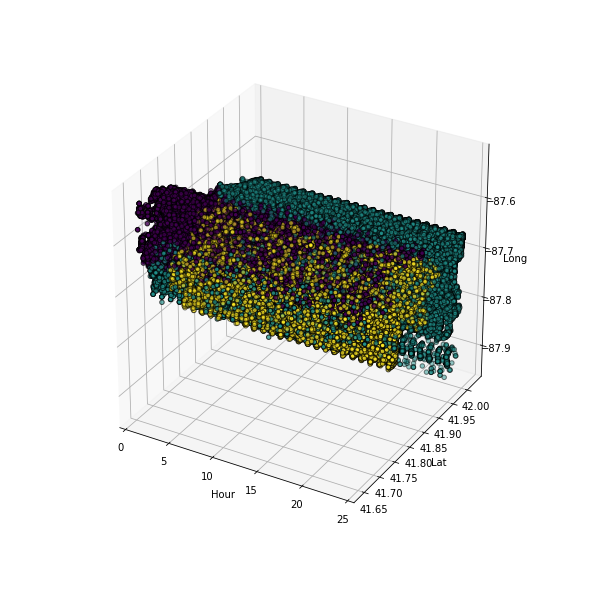

In [46]:
'''
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 8))

labels = kmeans.labels_

ax = Axes3D(fig, rect=[0, 0, 1, 1])

# lat, long and year
ax.scatter(data['Hour'], data['Latitude'], data['Longitude'], 
           c=labels.astype(np.float), edgecolor='k')

#ax.w_xaxis.set_ticklabels([])
#ax.w_yaxis.set_ticklabels([])
#ax.w_zaxis.set_ticklabels([])

ax.set_xlabel('Hour')
ax.set_ylabel('Lat')
ax.set_zlabel('Long')
ax.dist = 12'''


In [ ]:
plt.scatter(data['Latitude'], data['Longitude'], c=labels.astype(np.float))
# plt.scatter()
plt.show()